<a href="https://colab.research.google.com/github/LucasLucena001/MetricsPersonal_Loan/blob/main/MetricsPeronal_Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_excel('/content/Bank_Personal_Loan_Modelling.xlsx')

In [11]:
df.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1


In [5]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [12]:
df = df.dropna()

In [13]:
from sklearn.model_selection import train_test_split

In [19]:
X = df[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account',  'Online']]

y = df['Personal_Loan']

In [20]:
y = pd.DataFrame(y)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 20, stratify = y)

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
lr = model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
lr.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
X_test.assign(Personal_Loan = y_test).assign(label = lr.predict(X_test))

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,Personal_Loan,label
144,49,23,70,2,1.50,2,0,0,0,0,0,0
2093,48,23,75,4,3.60,3,0,0,0,1,0,0
4297,33,9,73,4,3.40,1,140,0,0,1,0,0
4050,53,26,14,2,1.00,2,83,0,0,0,0,0
4530,33,9,19,2,1.00,2,92,0,0,1,0,0
1430,32,7,52,2,0.10,1,0,0,0,1,0,0
4179,29,3,91,1,3.40,3,0,0,0,0,1,0
3028,63,39,38,3,0.10,3,178,0,0,1,0,0
830,29,5,72,3,0.70,2,81,0,0,0,0,0
4133,41,17,129,1,3.40,1,0,0,0,0,0,0


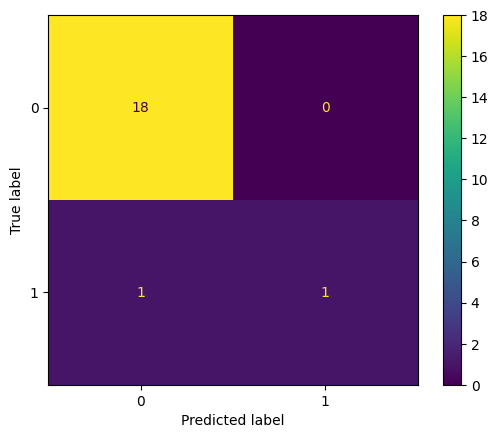

In [31]:
!pip install --upgrade scikit-learn
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, values_format = 'd')
plt.show()

In [26]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [27]:
print(f'Acurácia Treino: {accuracy_score(y_train, lr.predict(X_train))}')
print(f'Acurácia Teste: {accuracy_score(y_test, lr.predict(X_test))}')
print('====================================')
print(f'Acurácia Balanceada Treino: {balanced_accuracy_score(y_train, lr.predict(X_train))}')
print(f'Acurácia Balanceada Teste: {balanced_accuracy_score(y_test, lr.predict(X_test))}')
print('====================================')
print(f'Precisão Treino: {precision_score(y_train, lr.predict(X_train))}')
print(f'Precisão Teste: {precision_score(y_test, lr.predict(X_test))}')
print('====================================')
print(f'Recall Treino: {recall_score(y_train, lr.predict(X_train))}')
print(f'Recall Teste: {recall_score(y_test, lr.predict(X_test))}')
print('====================================')
print(f'F1 Score Treino: {f1_score(y_train, lr.predict(X_train))}')
print(f'F1 Score Teste: {f1_score(y_test, lr.predict(X_test))}')
print('====================================')
print(f'ROCAUC Treino: {roc_auc_score(y_train, lr.predict_proba(X_train)[:, 1])}')
print(f'ROCAUC Teste: {roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])}')

Acurácia Treino: 0.9491967871485943
Acurácia Teste: 0.95
Acurácia Balanceada Treino: 0.7942583398545324
Acurácia Balanceada Teste: 0.75
Precisão Treino: 0.8205128205128205
Precisão Teste: 1.0
Recall Treino: 0.602510460251046
Recall Teste: 0.5
F1 Score Treino: 0.6948130277442702
F1 Score Teste: 0.6666666666666666
ROCAUC Treino: 0.9532597320763063
ROCAUC Teste: 0.9722222222222222


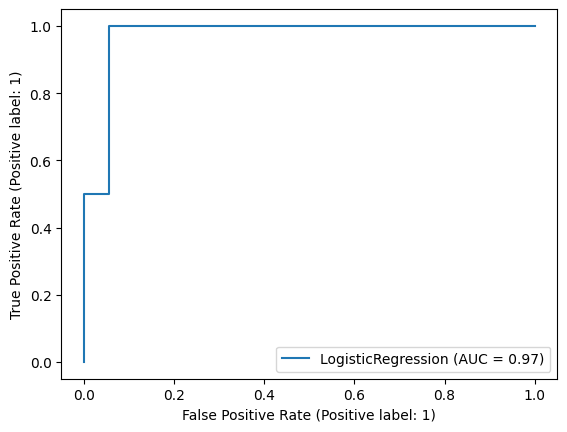

In [28]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_estimator(lr, X_test, y_test)
plt.show()

In [29]:
metricas = {
    'model': ['Logistic Regression', 'Logistic Regression'],
    'modo': ['treino', 'teste'],
    'accuracy': [accuracy_score(y_train, lr.predict(X_train)), accuracy_score(y_test, lr.predict(X_test))],
    'balanced_accuracy': [balanced_accuracy_score(y_train, lr.predict(X_train)), balanced_accuracy_score(y_test, lr.predict(X_test))],
    'precision': [precision_score(y_train, lr.predict(X_train)), precision_score(y_test, lr.predict(X_test))],
    'recall': [recall_score(y_train, lr.predict(X_train)), recall_score(y_test, lr.predict(X_test))],
    'f1_score': [f1_score(y_train, lr.predict(X_train)), f1_score(y_test, lr.predict(X_test))],
    'rocauc': [roc_auc_score(y_train, lr.predict_proba(X_train)[:,1]), roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])]

}

pd.DataFrame(metricas)

,model,modo,accuracy,balanced_accuracy,precision,recall,f1_score,rocauc
0,Logistic Regression,treino,0.949197,0.794258,0.820513,0.60251,0.694813,0.953260
1,Logistic Regression,teste,0.950000,0.750000,1.000000,0.50000,0.666667,0.972222
